In [53]:
# importare tutte le librerie necessarie
import pandas as pd
import numpy as np
# from tabulate import tabulate
import matplotlib.pyplot as plt
databases = [r'3d_printers.csv', r'modellazione_3d.csv', r'stampa_3d.csv', r'stampante_3d.csv', r'stampanti_3d_software.csv',]
# db1 = r"progetti.csv"  #inserire il path della set di dati

data = pd.read_csv(databases[0], sep=';', encoding='UTF-8')
data.head()

data1 = pd.read_csv(databases[1], sep=';', encoding='UTF-8')
data1.head()
data1.shape

data2 = pd.read_csv(databases[2], sep=';', encoding='UTF-8')
data2.head()

data3 = pd.read_csv(databases[3], sep=';', encoding='UTF-8')
data3.head()

data4 = pd.read_csv(databases[4], sep=';', encoding='UTF-8')
data4.head()

combined = pd.concat([data,data1], axis=0)
combined = pd.concat([combined,data2], axis=0)
combined = pd.concat([combined,data3], axis=0)
combined = pd.concat([combined,data4], axis=0)
# combined = pd.concat([combined,data5], axis=0)

combined.head()
combined.shape

combined = combined.drop_duplicates()
combined.shape

filter_theme = combined[(combined['OC_TEMA_SINTETICO'] == 'Occupazione e lavoro')]

filter_region = combined[(combined['DEN_REGIONE'] =='MARCHE')]

In [54]:
filter_theme.shape


(198, 199)

In [55]:
filter_region.shape

(14, 199)

In [123]:
macroarea = combined['OC_MACROAREA']  
regione = combined['DEN_REGIONE']
db_regions_area = pd.concat([regione,macroarea], axis = 1)
print(db_regions_area)

              DEN_REGIONE OC_MACROAREA
0                PIEMONTE  Centro-Nord
0                  UMBRIA  Centro-Nord
1   FRIULI-VENEZIA GIULIA  Centro-Nord
2   FRIULI-VENEZIA GIULIA  Centro-Nord
3   FRIULI-VENEZIA GIULIA  Centro-Nord
..                    ...          ...
59                 VENETO  Centro-Nord
60               CAMPANIA  Mezzogiorno
61  FRIULI-VENEZIA GIULIA  Centro-Nord
62  FRIULI-VENEZIA GIULIA  Centro-Nord
63  FRIULI-VENEZIA GIULIA  Centro-Nord

[949 rows x 2 columns]


In [126]:
sud = db_regions_area[(db_regions_area['OC_MACROAREA'] == 'Mezzogiorno')]
nord = db_regions_area[(db_regions_area['OC_MACROAREA'] == 'Centro-Nord')]
print(nord)

              DEN_REGIONE OC_MACROAREA
0                PIEMONTE  Centro-Nord
0                  UMBRIA  Centro-Nord
1   FRIULI-VENEZIA GIULIA  Centro-Nord
2   FRIULI-VENEZIA GIULIA  Centro-Nord
3   FRIULI-VENEZIA GIULIA  Centro-Nord
..                    ...          ...
58                 VENETO  Centro-Nord
59                 VENETO  Centro-Nord
61  FRIULI-VENEZIA GIULIA  Centro-Nord
62  FRIULI-VENEZIA GIULIA  Centro-Nord
63  FRIULI-VENEZIA GIULIA  Centro-Nord

[752 rows x 2 columns]


In [130]:
regions_nord = nord['DEN_REGIONE'].drop_duplicates()
regions_sud = sud['DEN_REGIONE'].drop_duplicates()


# regions.shape
# print(regions)
#print(es)
array_nord_region = []
array_sud_region = []
array_nord_num = []
array_sud_num = []


for x in regions_nord:
    filter_region = combined[(combined['DEN_REGIONE'] == x)]
    array_nord_num.append(filter_region.shape[0])
    array_nord_region.append(x)
for x in regions_sud:
    filter_region = combined[(combined['DEN_REGIONE'] == x)]
    array_sud_num.append(filter_region.shape[0])
    array_sud_region.append(x)
print(array_nord_region)
print(array_nord_num)
print(array_sud_region)
print(array_sud_num)
    


['PIEMONTE', 'UMBRIA', 'FRIULI-VENEZIA GIULIA', 'TOSCANA', 'EMILIA-ROMAGNA', 'TRENTINO-ALTO ADIGE', 'LAZIO', 'LIGURIA', 'MARCHE', 'VENETO', "VALLE D'AOSTA", 'LOMBARDIA', 'LOMBARDIA:::EMILIA-ROMAGNA:::TOSCANA']
[18, 28, 229, 143, 38, 4, 88, 42, 14, 89, 5, 51, 3]
['CAMPANIA', 'PUGLIA', 'SICILIA', 'ABRUZZO', 'SARDEGNA', 'BASILICATA', 'CALABRIA', 'MOLISE']
[62, 32, 29, 17, 24, 17, 15, 1]


In [ ]:
# importare tutte le librerie necessarie
import pandas as pd
import numpy as np
# from tabulate import tabulate
# import matplotlib.pyplot as plt
databases = [r'3d_printers.csv', r'modellazione_3d.csv', r'stampa_3d.csv', r'stampante_3d.csv', r'stampanti_3d_software.csv']
# db1 = r"progetti.csv"  #inserire il path della set di dati

data = pd.read_csv(databases[0], sep=';', encoding='UTF-8')
data1 = pd.read_csv(databases[1], sep=';', encoding='UTF-8')
data2 = pd.read_csv(databases[2], sep=';', encoding='UTF-8')
data3 = pd.read_csv(databases[3], sep=';', encoding='UTF-8')
data4 = pd.read_csv(databases[4], sep=';', encoding='UTF-8')

full_df = pd.concat([data, data1])
result = full_df.drop_duplicates(keep='last')

# result = pd.merge(data, data1, on='key')
# result = pd.merge(result, data2, on='key')
# result = pd.merge(result, data3, on='key')
# result = pd.merge(result, data4, on='key')

# result = resultdrop_duplicates()

result.to_csv('total_data.csv', index=False)

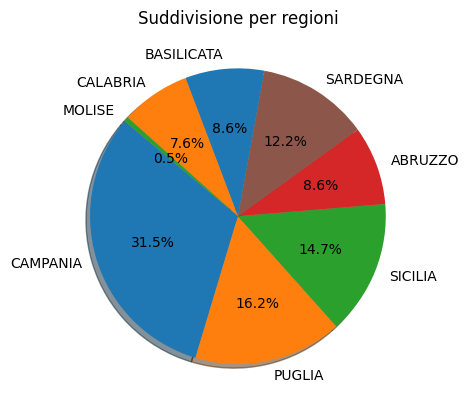

In [131]:
country_data = array_sud_region
medal_data = array_sud_num
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b","#1f77b4", "#ff7f0e", "#2ca02c"]
explode = (0, 0, 0, 0, 0, 0, 0, 0)  
plt.pie(medal_data, labels=country_data, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
# plt.hist(array, bins = 21)ù
plt.title("Suddivisione per regioni")
plt.show()

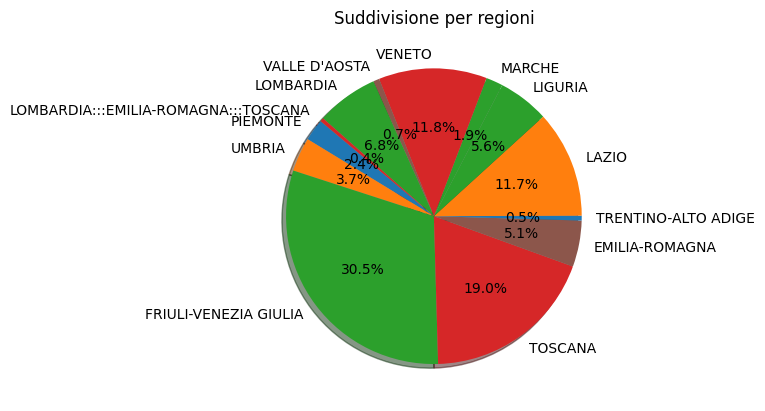

In [134]:
country_data = array_nord_region
medal_data = array_nord_num
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b","#1f77b4", "#ff7f0e", "#2ca02c","#2ca02c", "#d62728", "#8c564b","#2ca02c", "#d62728"]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,)  
plt.pie(medal_data, labels=country_data, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
# plt.hist(array, bins = 21)
plt.title("Suddivisione per regioni")
plt.show()

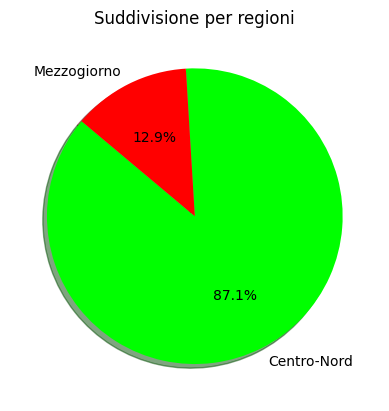

In [138]:
country_data = ['Centro-Nord', 'Mezzogiorno']
medal_data = [79.24, 11.76]
colors = ["#00ff00","#ff0000"]
explode = (0, 0)  
plt.pie(medal_data, labels=country_data, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
# plt.hist(array, bins = 21)ù
plt.title("Suddivisione per regioni")
plt.show()

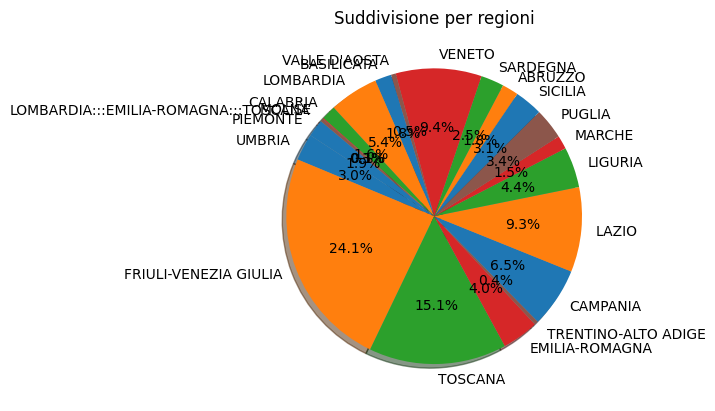

In [132]:
country_data = array2
medal_data = array
colors = ["#1f77b4","#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b","#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b","#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b","#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
explode = (0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0, 0, 0, 0, 0,0)  
plt.pie(medal_data, labels=country_data, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
# plt.hist(array, bins = 21)ù
plt.title("Suddivisione per regioni")
plt.show()

In [148]:
filter_themes = combined['OC_TEMA_SINTETICO'].drop_duplicates()

print(filter_themes)

filter_theme = combined[(combined['OC_TEMA_SINTETICO'] == 'Reti e servizi digitali')].shape
print(filter_theme)

0            Ricerca e innovazione
0             Occupazione e lavoro
5      Competitività delle imprese
11         Istruzione e formazione
88                         Energia
155        Reti e servizi digitali
247    Inclusione sociale e salute
Name: OC_TEMA_SINTETICO, dtype: object
(108, 199)
